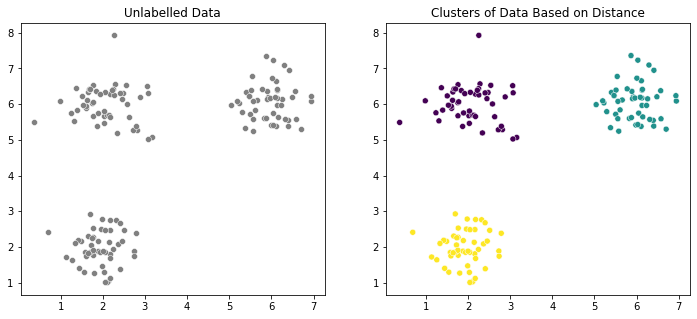

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Generate sample data
np.random.seed(42)
X = np.vstack([
    np.random.normal(loc=[2, 2], scale=0.5, size=(50, 2)),
    np.random.normal(loc=[6, 6], scale=0.5, size=(50, 2)),
    np.random.normal(loc=[2, 6], scale=0.5, size=(50, 2))
])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)

# Create the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# First plot: All points in the same color
sns.scatterplot(x=X[:, 0], y=X[:, 1], color="gray", ax=axes[0])
axes[0].set_title("Unlabelled Data")

# Second plot: Points colored by cluster
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette="viridis", ax=axes[1], legend=False)
axes[1].set_title("Clusters of Data Based on Distance")

plt.show()


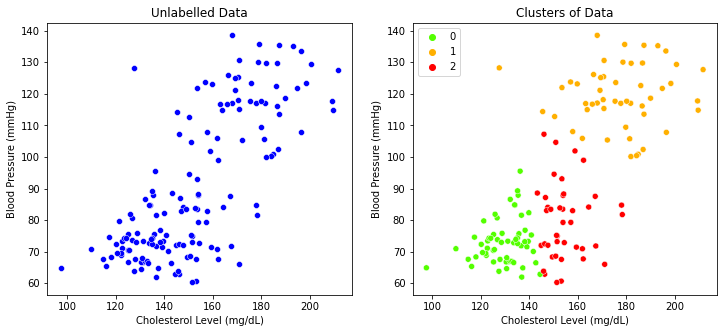

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Generate synthetic medical data (Cholesterol Level vs Blood Pressure)
np.random.seed(42)
X = np.vstack([
    np.random.normal(loc=[180, 120], scale=[20, 10], size=(50, 2)),  # High-risk patients
    np.random.normal(loc=[150, 80], scale=[15, 10], size=(50, 2)),   # Moderate-risk patients
    np.random.normal(loc=[130, 70], scale=[10, 5], size=(50, 2))     # Low-risk patients
])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)

# Create the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# First plot: All points in the same color
sns.scatterplot(x=X[:, 0], y=X[:, 1], color="blue", ax=axes[0])
axes[0].set_title("Unlabelled Data")
axes[0].set_xlabel("Cholesterol Level (mg/dL)")
axes[0].set_ylabel("Blood Pressure (mmHg)")

# Second plot: Points colored by cluster
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette="prism_r", ax=axes[1], legend=True)
axes[1].set_title("Clusters of Data")
axes[1].set_xlabel("Cholesterol Level (mg/dL)")
axes[1].set_ylabel("Blood Pressure (mmHg)")

plt.show()


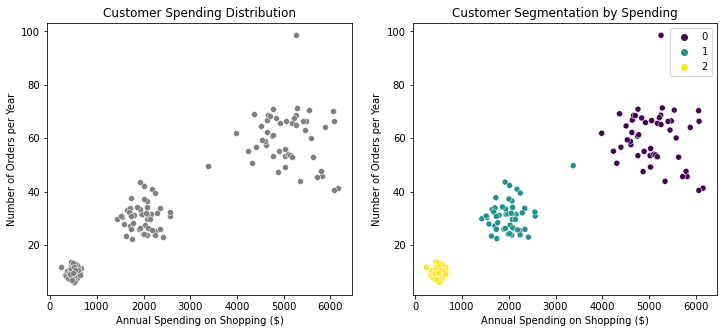

In [14]:
#Clustering
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Generate synthetic customer data
np.random.seed(42)
X = np.vstack([
    np.random.normal(loc=[500, 10], scale=[100, 2], size=(50, 2)),   # Low spenders
    np.random.normal(loc=[2000, 30], scale=[300, 5], size=(50, 2)),  # Medium spenders
    np.random.normal(loc=[5000, 60], scale=[500, 10], size=(50, 2))  # High spenders
])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)

# Create the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# First plot: All points in the same color
sns.scatterplot(x=X[:, 0], y=X[:, 1], color="gray", ax=axes[0])
axes[0].set_title("Customer Spending Distribution")
axes[0].set_xlabel("Annual Spending on Shopping ($)")
axes[0].set_ylabel("Number of Orders per Year")

# Second plot: Points colored by cluster
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette="viridis", ax=axes[1], legend=True)
axes[1].set_title("Customer Segmentation by Spending")
axes[1].set_xlabel("Annual Spending on Shopping ($)")
axes[1].set_ylabel("Number of Orders per Year")

plt.show()


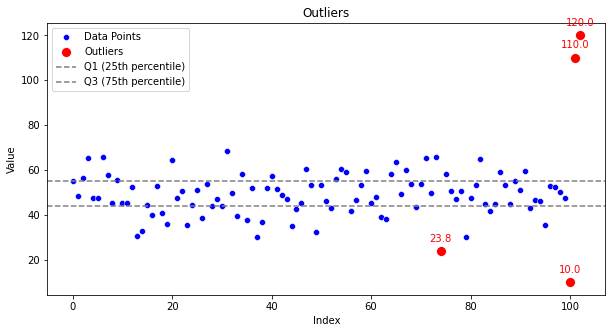

In [16]:
#Outliers
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate synthetic data (with outliers)
np.random.seed(42)
data = np.concatenate([
    np.random.normal(loc=50, scale=10, size=100),  # Normal data
    np.array([10, 110, 120])  # Outliers
])

# Identify outliers using IQR (Interquartile Range)
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data < lower_bound) | (data > upper_bound)]
outlier_indices = np.where((data < lower_bound) | (data > upper_bound))[0]

# Plot the data
plt.figure(figsize=(10, 5))
sns.scatterplot(x=np.arange(len(data)), y=data, color='blue', label="Data Points")

# Highlight and annotate outliers
sns.scatterplot(x=outlier_indices, y=outliers, color='red', s=100, label="Outliers")
for i, outlier in zip(outlier_indices, outliers):
    plt.annotate(f"{outlier:.1f}", (i, outlier), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, color='red')

plt.axhline(Q1, color='gray', linestyle='--', label="Q1 (25th percentile)")
plt.axhline(Q3, color='gray', linestyle='--', label="Q3 (75th percentile)")
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Outliers")
plt.legend()
plt.show()


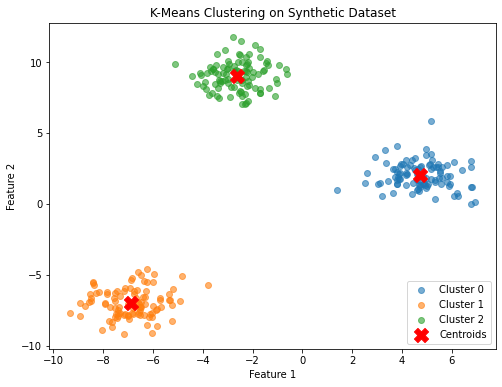

In [29]:
#K-means 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate a synthetic dataset with 3 clusters
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, 
                  random_state=42)

# Apply K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # Define number of clusters
labels = kmeans.fit_predict(X)  # Assign cluster labels to each data point
centroids = kmeans.cluster_centers_  # Get the cluster centers

# Plot the clustered data points
plt.figure(figsize=(8, 6))  # Set figure size

# Plot each cluster with a unique color
unique_labels = set(labels)
for label in unique_labels:
    plt.scatter(X[labels == label, 0], X[labels == label, 1], 
                label=f"Cluster {label}", alpha=0.6)

# Plot centroids as larger red dots
plt.scatter(centroids[:, 0], centroids[:, 1], 
            c="red", marker="X", s=200, label="Centroids")

# Set axis labels and title
plt.xlabel("Feature 1")  # Label x-axis
plt.ylabel("Feature 2")  # Label y-axis
plt.title("K-Means Clustering on Synthetic Dataset")  # Add plot title
plt.legend(loc="lower right")  # Place legend at bottom right
plt.show()  # Display the plot


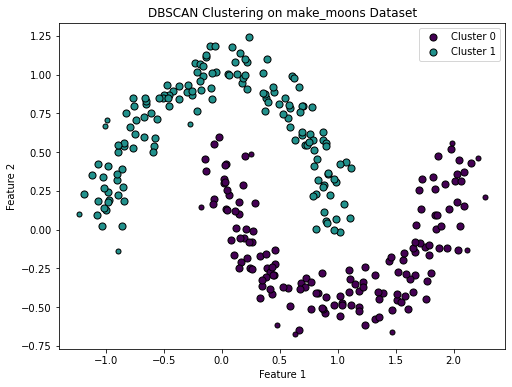

In [28]:
#DBSCAN on make_moons dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Generate synthetic dataset with two interleaving half-moon shapes
X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)  # 300 points, some noise added

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.2, min_samples=5)  # Set neighborhood radius (eps) and min cluster size
labels = dbscan.fit_predict(X)  # Perform clustering and get cluster labels

# Identify core points (points that form dense regions)
core_samples_mask = np.zeros_like(labels, dtype=bool)  # Create a mask for core points
core_samples_mask[dbscan.core_sample_indices_] = True  # Mark core points in the mask

# Plot the results
plt.figure(figsize=(8, 6))  # Set figure size
unique_labels = set(labels)  # Get unique cluster labels

for label in unique_labels:
    if label == -1:  # Noise points are labeled as -1 in DBSCAN
        color, marker, size = "red", "x", 100  # Noise points are marked with red 'x'
        label_name = "Noise"
    else:  # For valid clusters
        color, marker, size = plt.cm.viridis(label / len(unique_labels)), "o", 50
        label_name = f"Cluster {label}"  # Assign label names

    # Select points belonging to the current cluster
    class_member_mask = labels == label  

    # Plot core points (high-density points)
    plt.scatter(X[class_member_mask & core_samples_mask, 0], 
                X[class_member_mask & core_samples_mask, 1], 
                c=[color], marker=marker, s=size, edgecolors="k", label=label_name)
    
    # Plot border points (points near dense regions)
    plt.scatter(X[class_member_mask & ~core_samples_mask, 0], 
                X[class_member_mask & ~core_samples_mask, 1], 
                c=[color], marker=marker, s=size/2, edgecolors="k")

# Set axis labels and title
plt.xlabel("Feature 1")  # Label x-axis
plt.ylabel("Feature 2")  # Label y-axis
plt.title("DBSCAN Clustering on make_moons Dataset")  # Add plot title
plt.legend(loc="upper right")  # Place legend in upper right
plt.show()  # Display the plot




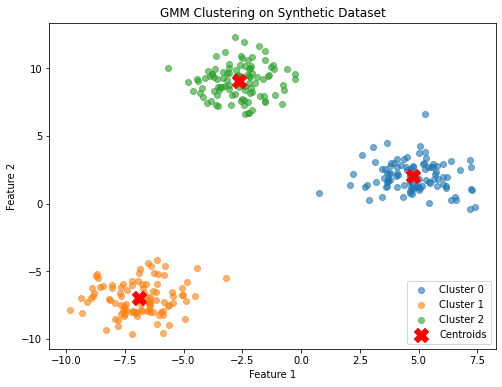

In [30]:
#Distribution based clustering: GMM Clustering
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture

# Generate synthetic dataset with 3 clusters
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.2, random_state=42)

# Apply Gaussian Mixture Model (GMM) clustering
gmm = GaussianMixture(n_components=3, random_state=42)  # Define 3 Gaussian components
labels = gmm.fit_predict(X)  # Assign probabilities and get cluster labels
probabilities = gmm.predict_proba(X)  # Get probability of each point belonging to each cluster
centroids = gmm.means_  # Get estimated cluster centers

# Plot the clustered data points
plt.figure(figsize=(8, 6))  # Set figure size

# Plot each cluster with a unique color, using probabilities for transparency
unique_labels = set(labels)
for label in unique_labels:
    plt.scatter(X[labels == label, 0], X[labels == label, 1], 
                alpha=0.6, label=f"Cluster {label}")

# Plot centroids as larger red 'X' markers
plt.scatter(centroids[:, 0], centroids[:, 1], 
            c="red", marker="X", s=200, label="Centroids")

# Set axis labels and title
plt.xlabel("Feature 1")  # Label x-axis
plt.ylabel("Feature 2")  # Label y-axis
plt.title("GMM Clustering on Synthetic Dataset")  # Add plot title
plt.legend(loc="lower right")  # Place legend at bottom right
plt.show()  # Display the plot


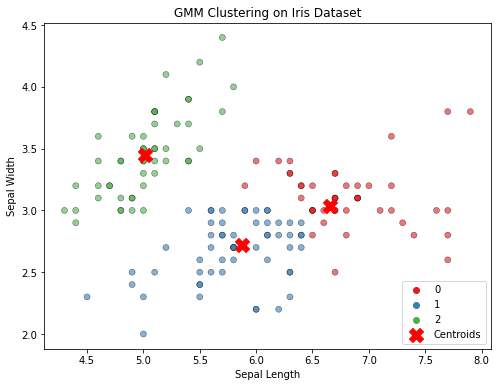

In [31]:
#Distribution based clustering: GMM Clustering on iris dataset
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Select the first two features for visualization

# Standardize the features for better clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Gaussian Mixture Model (GMM) clustering
gmm = GaussianMixture(n_components=3, random_state=42)  # Define 3 Gaussian components
labels = gmm.fit_predict(X_scaled)  # Assign probabilities and get cluster labels
centroids = gmm.means_  # Get estimated cluster centers (in scaled space)

# Transform centroids back to original scale
centroids_original = scaler.inverse_transform(centroids)

# Plot the clustered data points
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette="Set1", alpha=0.6, edgecolor="k")

# Plot centroids as larger red 'X' markers
plt.scatter(centroids_original[:, 0], centroids_original[:, 1], 
            c="red", marker="X", s=200, label="Centroids")

# Set axis labels and title
plt.xlabel("Sepal Length")  
plt.ylabel("Sepal Width")  
plt.title("GMM Clustering on Iris Dataset")  
plt.legend(loc="lower right")  
plt.show()


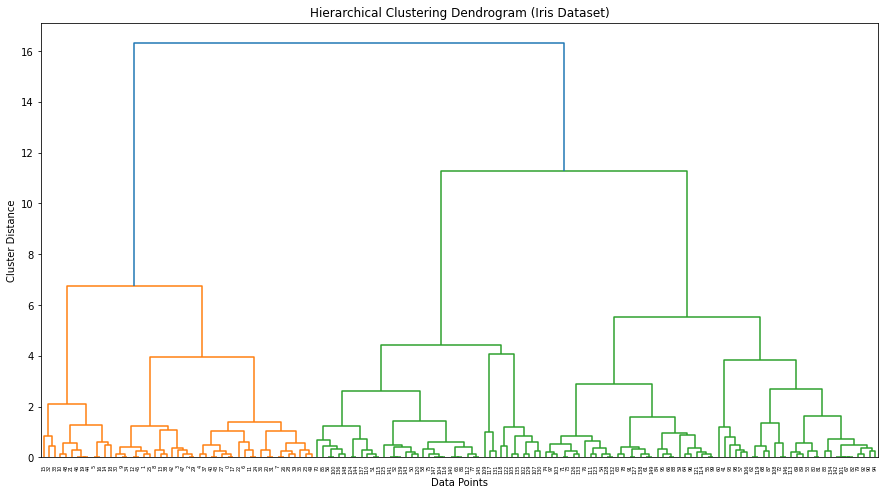

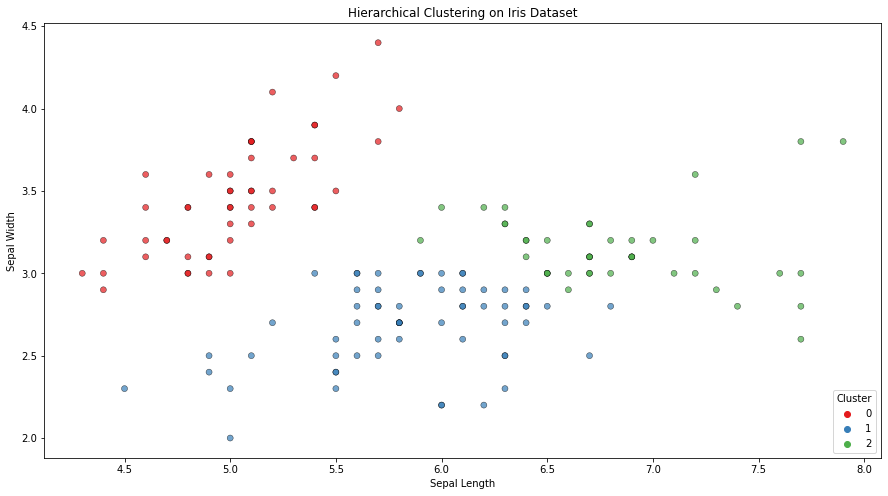

In [37]:
## Hierarchical Clustering
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Select only the first two features (Sepal Length and Sepal Width) for visualization

# Standardize the features for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compute the hierarchical clustering linkage matrix
# 'ward' minimizes variance within clusters for optimal grouping
linkage_matrix = linkage(X_scaled, method="ward")  

# Plot the dendrogram to visualize hierarchical clustering
plt.figure(figsize=(15, 8))
dendrogram(linkage_matrix, truncate_mode="level", p=10)  # Show only top 10 levels to simplify visualization
plt.xlabel("Data Points")  # Label x-axis
plt.ylabel("Cluster Distance")  # Label y-axis
plt.title("Hierarchical Clustering Dendrogram (Iris Dataset)")  # Add title
plt.show()

# Apply Agglomerative Clustering with 3 clusters (as Iris has 3 classes)
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage="ward")
labels = agg_clustering.fit_predict(X_scaled)  # Assign cluster labels to each data point

# Plot the clustered data points with colors representing different clusters
plt.figure(figsize=(15, 8))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette="Set1", alpha=0.7, edgecolor="k")

# Set axis labels and title
plt.xlabel("Sepal Length")  # X-axis label
plt.ylabel("Sepal Width")  # Y-axis label
plt.title("Hierarchical Clustering on Iris Dataset")  # Plot title

# Add legend to show the clusters
plt.legend(title="Cluster", loc="lower right")
plt.show()


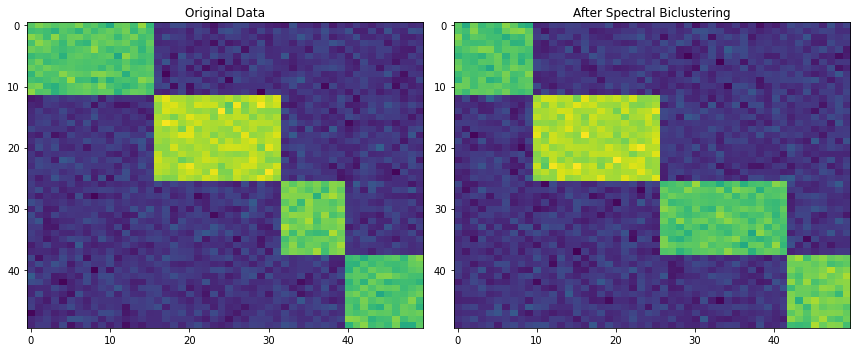

In [8]:
#Spectral Biclustering
import numpy as np
from sklearn.datasets import make_biclusters
from sklearn.cluster import SpectralBiclustering
import matplotlib.pyplot as plt

# Generate synthetic data with an embedded bicluster structure
# This creates a 50x50 matrix with 4 biclusters and some noise
data, rows, cols = make_biclusters(shape=(50, 50), 
                                   n_clusters=4, 
                                   noise=5, 
                                   shuffle=False, 
                                   random_state=0)

# Initialize the Spectral Biclustering model with 4 row-column cluster pairs
# The 'log' method is used to stabilize variance (useful for gene expression-like data)
model = SpectralBiclustering(n_clusters=4, method='log', random_state=0)

# Fit the model to the data to identify bicluster structure
model.fit(data)

# Rearrange the original matrix so that rows and columns are
# grouped by bicluster labels
# This makes the bicluster structure visually apparent
fit_data = data[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]

# Plot the original matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(data, aspect='auto', cmap='viridis')
axes[0].set_title("Original Data")

# Plot the matrix after biclustering to show grouped structure
axes[1].imshow(fit_data, aspect='auto', cmap='viridis')
axes[1].set_title("After Spectral Biclustering")

# Adjust spacing and display both plots
plt.tight_layout()
plt.show()
